회귀 및 해석(알고리즘 여러가지), 분류 및 해석 / 교호작용 해석 / 잔차분석 정상화 해석 / t-test

# 라이브러리

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as spst
import statsmodels.api as sm
from patsy import dmatrices

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 로딩

In [3]:
df = pd.read_csv('./data/ToothGrowth.csv')

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [26]:
df = df.rename(columns={'len':'y', 'supp':'x2','dose':'x1'})
df.head()

,y,x2,x1
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


# 도수분포표 / 시각화(countplot, hist)

In [27]:
df['x2'].value_counts()

OJ    30
VC    30
Name: x2, dtype: int64

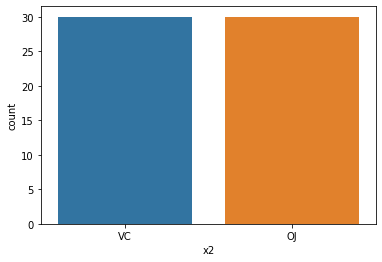

In [28]:
sns.countplot(df['x2'])        ; plt.show()

<AxesSubplot:xlabel='y'>

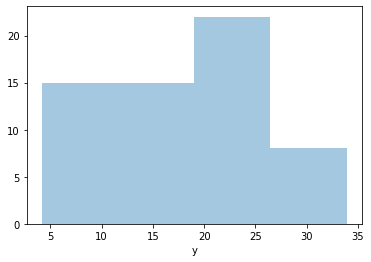

In [29]:
sns.distplot(df['y'], bins=4, kde=False)

# 공분산
- 공분산(covariance): 두 변수가 함께 변화하는 정도를 나타내는 지표

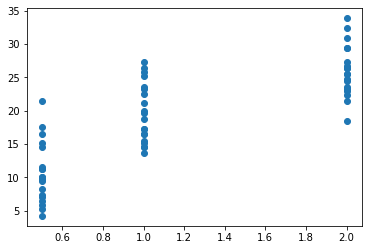

In [33]:
import matplotlib.pyplot as plt
plt.plot(df['x1'], df['y'], 'o')

In [36]:
# 공분산 계산
np.cov(df['x1'], df['y'])[0, 1]

3.861299435028249

- 부호:
- 공분산이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
- 공분산이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)

- 크기:
- 공분산 = 0이면 두 변수가 독립, 즉, 한 변수의 변화로 다른 변수의 변화를 예측하지 못함
- 공분산의 크기가 클 수록 두 변수는 함께 많이 변화
- 단위에 따라 공분산의 크기가 달라지므로 절대적 크기로 판단이 어려움
- 공분산을 -1 ~ 1 범위로 표준화 시킨 것이 상관계수

- 주의: 공분산은 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함
- 아래 z와 w는 w=z^2의 관계가 있지만 공분산은 0

# 상관계수

- 두 변수의 관계가 선형적(= 직선)인지 확인할 것!
- 산점도을 그려서 확인
- 명확하게 두 변수의 관계가 곡선 형태라면 spearman이나 kendall의 방법을 사용

In [37]:
df.corr()

,y,x1
y,1.000000,0.802691
x1,0.802691,1.000000


- 공분산과 비슷하게 해석
- 부호:
- 상관이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
- 상관이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)
- 크기:
- 상관 = 0이면 두 변수가 독립, 즉, 한 변수의 변화로 다른 변수의 변화를 예측하지 못함
- 상관이 클 수록 두 변수는 함께 많이 변화
- pearson 상관계수를 제곱하면 분산(=변화량)에서 공유하는 비율
- 예를 들어 x와 y의 상관계수가 0.4이면 그 제곱은 0.16(=16%)
- x의 분산 중 16%를 y와 공유 또는 x의 분산 중 16%가 y로 설명됨
- 주의: 상관계수는 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함
- 아래 z와 w는 w=z^2 의 관계가 있지만 상관계수는 0
- pearson 상관계수는 공분산을 그 기반으로 하기 때문에, 기본적으로 등간척도/비율척도 를 사용한 변수에만 적용가능함

In [39]:
# spearman
# 상관분석을 실시함에 있어 서열척도 를 사용한 변수가 포함되어 있거나
# 등간/비율척도를 사용한 변수들이라 하더라도, 두 변수 간의 관계가 비선형적 일 때 구하는 상관계수

import scipy.stats
scipy.stats.spearmanr(df['x1'], df['y']).correlation

0.8283414852955329

In [40]:
# kendall의 tau
# spearman의 상관계수와 마찬가지로, 비선형적 관게이거나 서열변수일 때 사용
# spearman의 상관계수보다 믿을만 한 것으로 알려짐 (특히 표본이 작을 때)
scipy.stats.kendalltau(df['x1'], df['y']).correlation

0.6959839025992953

# 상관계수의 통계적 검증
- 우리가 구한 상관계수는 표본에서 구한 것
- 동일한 모집단에서도 표본에 따라 상관계수가 달라질 수 있음

In [41]:
import scipy.stats

scipy.stats.pearsonr(df['x1'], df['y'])

(0.802691269332492, 1.2326982210946444e-14)

- 상관계수는 0.86이고 p 값은 0.001.
- p값은 모집단에서 상관계수가 0일 때, 현재와 같은 크기의 표본에서 관찰된 상관계수(여기서는 0.86)보다 더 극단적인 상관계수가 관찰될 확률
- 유의수준 0.05 하에서 p-value가 그보다 작으므로 "통계적으로 유의미하다"
<br>

- 상관관계가 있다고 반드시 인과관계가 있는 것은 아님
- 제3 변인의 문제, 이질적인 집단들의 합(심슨의 역설), 극단치(outliers)에 의한 인위적 상관 존재 가능성을 고려해야함

# 회귀(선형회귀)
- 모형적합도: 모형이 데이터에 얼마나 잘 맞는가?
- 회귀계수: 독립변수의 변화가 종속변수를 얼마나 변화시키는가?

In [3]:
df = pd.read_csv('./data/cars.csv')

## 회귀분석 사전 진단

- 사전 작업
- 산점도에 추세선을 넣어 데이터에 선형적인 패턴이 있는지 확인한다. 아래와 같이 그려보면 대체로 speed가 증가할 수록 dist도 증가하는 관계가 있는 것을 볼 수 있다.

<AxesSubplot:xlabel='speed', ylabel='dist'>

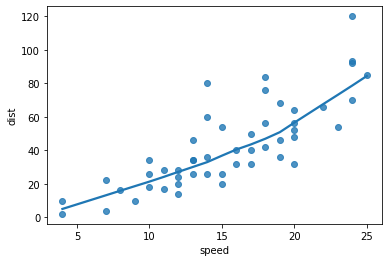

In [44]:
sns.regplot('speed', 'dist', lowess=True, data = df)

- 극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있다. 상자 그림을 그려서 극단값이 있는지 확인해본다. 아래 그림을 보면 dist에서 값 하나가 크게 위에 있는 것을 볼 수 있다.

Text(0.5, 1.0, 'Distance')

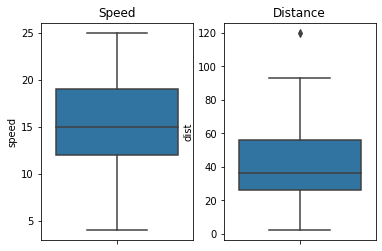

In [45]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

- 선형회귀분석은 독립변수와 종속변수가 정규분포를 따를 때 잘 작동한다. 밀도 플롯(density plot)을 그려서 정규분포의 형태인지 확인해본다.

Text(0.5, 1.0, 'Distance')

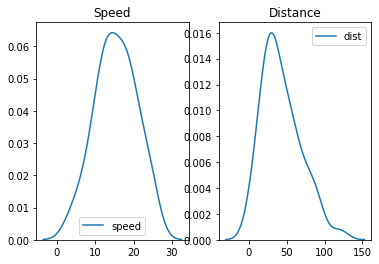

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

- 대체로 중심부에 데이터가 몰려있고 좌우로 갈 수록 줄어드는 정규분포와 비슷한 형태를 보인다. 
- 앞에서 봤듯이 dist에 위로 치우친 값이 있기 하나 있기 때문에 밀도 플롯도 오른쪽으로 약간 늘어진 모습을 보인다.

In [47]:
df['speed'].skew()

-0.11750986144663393

In [48]:
df['dist'].skew()

0.8068949601674215

- speed는 왜도가 -0.11이다 마이너스 쪽으로 약간 치우쳤다는 것을 뜻한다. dist의 왜도는 0.76으로 플러스 쪽으로 어느 정도 치우쳤다. 위에서 그래프로 본 것과 비슷한 결과이다.
- 문제가 심각해보이지는 않으므로 일단 분석을 실시해보자.

## 회귀분석 실시

In [4]:
from statsmodels.formula.api import ols

In [7]:
res = ols('dist ~ speed', data=df).fit()
res.summary()

# # 다중회귀 시 
# model = smf.ols(formula = '방문빈도 ~ 거래기간 + 총매출액 + 쿠폰사용횟수', data = data)
# result = model.fit()
# result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.49e-12
Time:                        21:42:06   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 모형 적합도
- 모형이 데이터에 잘 맞는 정도를 보여주는 지표들이다.
<br>

- R-squared: 0.651
- 모형 적합도(혹은 설명력)
- dist의 분산을 speed가 약 65%를 설명한다
- 각 사례마다 dist에 차이가 있다.
<br>

- Adj. R-squared: 0.644
- 독립변수가 여러 개인 다중회귀분석에서 사용
- 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
- 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다
<br>

- F-statistic: 89.57, Prob(F-statistic): 1.49e-12
- 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)
- 즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음
<br>

- 로그 우도: -206.58 
- 종속변수가 정규분포라 가정했을 때 그 우도
- 로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다
<br>

- AIC, BIC: 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

### 회귀계수

- Coef는 데이터로부터 얻은 계수의 추정치를 말한다.
- 절편(Intercept)의 추정치는 -17.5791로, speed가 0일 때 dist의 값이다.
- speed의 계수 추정치는 3.9324로 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미한다.
- 이를 수식으로 정리하면 아래와 같다.
- dist=−17.5791+3.9324×speed
- 추정치의 표 중간의 P(>|t|)는 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값을 나타낸다. 이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미한다. 보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 한다.
- 즉, speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의미하다.

### 결과 보고
- 논문 등에서 회귀분석의 결과는 다음 순서대로 보고한다.
- 먼저 모형적합도를 보고한다. F 분포의 파라미터 2개와 그 때의 F 값, p-value와 유의수준의 비교를 적시한다.
- dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,48) = 89.57, p < 0.05).
- 다음으로 독립변수에 대해 보고한다.
- speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다(t(48) = 9.464, p < 0.05).

## 절편의 고정
- 앞선 분석 결과에서 speed가 0일 때 dist가 -17.5791이 되는데 거리가 마이너스가 될 수는 없으므로 해석이 어색하다. 이럴 경우 모형에서 절편을 제거한다. 절편을 제거하면, 절편을 0으로 고정시킨 것과 같아진다.

In [52]:
from statsmodels.formula.api import ols
res = ols('dist ~ 0 + speed', df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                    9.23e-26
Time:                        22:21:08   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.000       2.625       3.193
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.573
Skew:                           1.202   Prob(JB):                     0.000415
Kurtosis:                       4.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모형에서 절편을 제거한 경우 R제곱을 해석할 때 주의가 필요하다. 절편이 있는 경우와 없는 경우 계산 방식이 다르기 때문이다. 절편이 있는 경우에 R제곱은 종속변수의 분산에서 설명하는 비율을 나타내지만, 절편이 없는 경우는 종속변수의 제곱의 평균에서 설명하는 비율을 나타낸다.

# 다중공선성
- 공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우
- 다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- 다중공선성이 있으면:
- 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다
- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다
<br>

- 다중공선성 진단
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [53]:
df = pd.read_csv('./data/crab.csv')

In [54]:
df.head(3)

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1


In [56]:
from statsmodels.formula.api import ols
model = ols('y ~ sat + weight + width', df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           2.30e-26
Time:                        22:34:47   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.063      -1.924       0.051
sat            0.0971      0.009     11.018      0.000       0.080       0.115
weight        -0.0465      0.098     -0.475      0.635      -0.240       0.147
width          0.0535      0.026      2.023      0.045       0.001       0.106
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.545
Skew:                           0.086   Prob(JB):                       0.0230
Kurtosis:                       1.992   Cond. No.                         526.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결과를 보면 유의수준 5%에서 sat와 width는 통계적으로 유의미하고, weight는 유의미하지 않게 나왔다.

## VIF 계산

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
model.exog_names # 위에서 만든 모델의 독립변수(절편 포함)

['Intercept', 'sat', 'weight', 'width']

In [59]:
# 첫 번째 독립변수의 VIF를 계산함
variance_inflation_factor(model.exog, 1)

1.15883687808578

In [60]:
# 한 번에 모든 컬럼의 VIF를 계산함
# 절편의 VIF는 구하지 않는다.
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  

,컬럼,VIF
0,sat,1.158837
1,weight,4.801679
2,width,4.688660


- weight와 width의 VIF가 각각 4.8과 4.6이다. 게의 무게(weight)와 너비(width)는 서로 상관이 높기 때문에 VIF가 약간 높게 나타나는 것이다.

- 계수가 통계적으로 유의미하지 않다면 대처
- 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음


- 변수들을 더하거나 빼서 새로운 변수를 만든다
  - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
  - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
- 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
  - 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

In [62]:
# weight와 width가 VIF 기준을 넘는 것은 아니지만 실험삼아 width를 제거해보자.
model = ols('y ~ sat + weight', df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     85.93
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.63e-26
Time:                        22:43:05   Log-Likelihood:                -57.901
No. Observations:                 173   AIC:                             121.8
Df Residuals:                     170   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.114      0.433      0.665      -0.176       0.275
sat            0.0976      0.009     10.982      0.000       0.080       0.115
weight         0.1260      0.049      2.598      0.010       0.030       0.222
==============================================================================
Omnibus:                       40.033   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.709
Skew:                           0.121   Prob(JB):                       0.0128
Kurtosis:                       1.928   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 이전의 분석에서는 weight가 유의미하지 않게 나왔지만, width를 제거한 후에는 유의미하게 나왔다. weight와 width가 공선성이 있기 때문에 width를 제거하자 weight가 유의미해진 것으로 볼 수 있다.

# 잔차분석
- 회귀분석 결과를 바탕으로 다양한 잔차 분석을 실시한다.

In [63]:
df = pd.read_csv('./data/cars.csv')
res = ols('dist ~ speed', data=df).fit()

## 모형의 선형성
- 예측값(fitted)과 잔차(residual)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
- 빨간 실선은 잔차의 추세를 나타냄
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
fitted = res.predict(df)
residual = df['dist'] - fitted # residual이 잔차

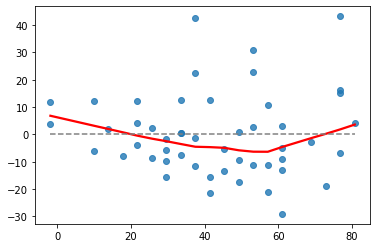

In [65]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

## 잔차의 정규성
- 잔차가 정규분포를 따른다는 가정
- Q-Q 플롯으로 확인할 수 있음
- 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

In [67]:
import scipy.stats
sr = scipy.stats.zscore(residual) # residual이 잔차(위에서 구함)
(x, y), _ = scipy.stats.probplot(sr)

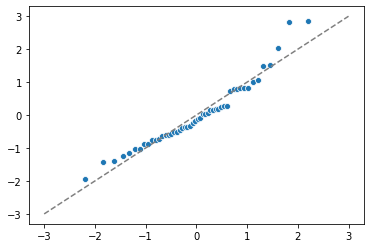

In [68]:
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

- 잔차의 정규성은 샤피로 검정으로 확인할 수 있다. 아래 분석에서 두 번째 값이 p값이다. p값이 0.02이므로 유의수준 5%에서 잔차의 정규성이 위반되었다고 판단한다.

In [69]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)

## 잔차의 등분산성
- 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
- 빨간색 실선이 수평선을 그리는 것이 이상적

<AxesSubplot:>

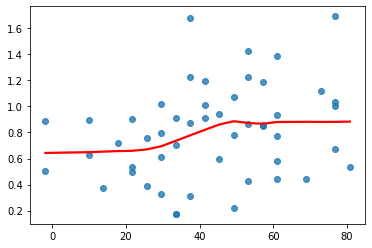

In [70]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

## 극단값
- Cook's distance는 극단값을 나타내는 지표
- 48번, 22번, 38번 자료가 특히 예측에서 많이 벗어남을 알 수 있음

In [71]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()


48    0.340396
22    0.085552
38    0.068053
44    0.053176
34    0.052576
dtype: float64

## 잔차의 독립성
- 회귀분석에서 잔차는 정규성, 등분상성 그리고 독립성을 가지는 것으로 가정
- 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
- 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시


- model.fit().summary() 결과에 포함되어 있음. Durbin-Watson(더빈왓슨, DW검정) DW검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다. 보통 1.5 ~ 2.5사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW검정값이 0 또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고, 이는 t값, F값, R제곱을 실제보다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.


## 잔차 분석 결과를 바탕으로 대응/교정
- 잔차 분석 결과에 따라 다양한 방식의 대응이 가능
  - 극단값을 제거
  - 독립변수를 추가
  - 종속변수를 수학적으로 변환
- 위의 예에서는 48번 자료가 극단값으로 보이고 이 때문에 잔차의 정규성이 위배되는 것으로 추측된다. 따라서 48번 자료를 제거하고 다시 분석을 시도해볼 수 있다.

# 평균비교
## t검증
### 독립표본 t검증
- 두 독립표본의 평균을 통계적으로 비교하는 기법


- 두 표본집단을 구성(표집/수집)할 때 독립이면 독립표본
- 대응표본: 부부 100쌍을 뽑아 남편 100명과 아내 100명으로 두 집단을 비교하는 경우
- 독립표본: 무작위로 남자 100명과 여자 100명을 뽑아 두 집단을 비교하는 경우


- 독립표본 t-test의 논리
- 두 집단의 모평균(모집단의 평균)은 동일하다는 가설
- 두 집단의 모평균 차이는 0
- 표본평균들은 모집단 평균과 다를 수 있지만 차이가 크지 않을 것
- 따라서 두 집단의 표본평균의 차이가 0은 아닐 수 있지만, 그렇게 큰 차이를 보이지는 않을 것임
- 만약, 두 표본평균이 심각하게 차이가 난다면, 두 집단의 모평균이 동일하다는, 즉 두 집단의 모평균 차이가 0이라는 가설이 맞지 않을 가능성이 높음
- 따라서, 두 표본평균이 차이나는 정도에 대한 가능성(확률)을 계산하고 이를 바탕으로 "두 집단의 모평균(모집단의 평균)은 동일하다는 가설"에 대해서 판단함

In [73]:
# 두 집단 dat_M과 dat_F가 있음
dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

In [74]:
# dat_M의 평균은 100, dat_F의 평균은 108
import numpy as np

np.mean(dat_M)

100.0

In [75]:
np.mean(dat_F)

108.0

- 두 집단의 평균 차이가 통계적으로 유의미한지 t-검증

In [76]:
import scipy.stats

scipy.stats.ttest_ind(dat_M, dat_F, equal_var=False)

Ttest_indResult(statistic=-2.670573872669349, pvalue=0.01108318824471652)

- 검증 결과, 두 집단의 평균 차이는 통계적으로 유의미함 (p<0.05)


- 통계적 유의미성
- 검증 결과, 통계적으로 유의미한 결과를 얻었다면?
- 귀무가설(null hypothesis)을 전제로 했을 때, 어떤 통계량의 값을 얻을 확률이, 연구자가 정한 유의수준보다 작을 경우 "통계적으로 유의미하다"라고 표현함


- 유의수준
- 어떤 사건이 일어날 확률이 희박한지 판단하기 위해 연구자가 주관적으로 정하는 기준
- 어떤 사건이 일어날 확률이 유의수준보다 작으면, 그 사건은 유의미한 사건(희귀한 사건)으로 여기겠다는 것임
- 통상적으로 학계에서는 0.05나 0.01을 관례적으로 사용

### t검증 결과보고
- t-test에서 효과 크기(effect size)란 두 집단의 평균 차이를 일정한 기준으로 표현한 것
- 효과 크기의 표현 방법에는 Cohen's d, Pearson's r 등 여러 가지가 있음
- 다른 실험의 효과 크기와 비교하여 상대적으로 판단한다.
- 절대적인 것은 아니나 보통 0.2 정도면 작은 편, 0.5 정도면 중간, 0.8이면 큰 편

In [80]:
# 먼저 t-test 수행
m = scipy.stats.ttest_ind(dat_M, dat_F, equal_var=False)

In [79]:
# Cohen's d"

t = m.statistic
df = len(dat_M) + len(dat_F) - 2

abs(t) / np.sqrt(df)

0.4332242888591059

In [81]:
# Pearson's r:

t2 = t ** 2

np.sqrt(t2 / (t2 + df))

0.39752319599996255

- 독립표본 t 검증 결과 보고


- 각 표본에 대한 기술통계(평균, 표준편차, 표본크기 등)
- t값과 그 때의 자유도(df)
- p-value와 유의수준의 비교 (p-value를 적시하지는 않음)
- 효과크기(주로 Cohen's d나 Pearson's r)와 그에 대한 해석
- 집단 M과 F에 대하여 독립표본 t 검증을 실시한 결과, 집단 M의 측정값(M = 100, SD = 9.515)은 집단 F의 측정값(M = 108, SD = 9.431)보다 통계적으로 유의미하게 낮았으며(t(37.997) = -2.671, p < 0.05), 효과 크기는 중간 수준이었다(Cohen's d = 0.43, r = 0.39).

### 대응표본 t검증
- 대응표본이란?
- 두 집단의 자료를 쌍으로 묶을 수 있을 때
- 예) 남편과 아내, 쌍둥이, before & after
- 두 집단의 자료를 쌍으로 묶어야 하기 때문에, 독립표본과는 달리 두 집단의 자료 갯수가 동일해야 함


- 대응표본 t-test의 논리
- 쌍을 이루고 있는 두 값의 차이를 구함
- 모집단에서 차이의 평균은 0이라고 귀무가설을 세움
- 그렇다면 표본에서도 차이의 평균은 0에 가까울 것
- 표본에서 구한 차이의 평균이 0보다 심각하게 크다면, 귀무가설이 옳을 확률은 희박
- 그렇다면 귀무 가설을 기각하게 되고, 두 집단 간 차이가 유의미하다고 말하는 것


- 대응표본 t-test 실시하기
- dat_M과 dat_F가 순서대로 짝지어져 있다고 가정(예: 117과 121, 108과 101 등등)

In [82]:
# dat_M과 dat_F가 순서대로 짝지어져 있다고 가정(예: 117과 121, 108과 101 등등)

dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

- paired=T를 하여 대응표본 t-test:

In [83]:
import scipy.stats

scipy.stats.ttest_rel(dat_M, dat_F)

Ttest_relResult(statistic=-2.9868874599588247, pvalue=0.007578486289181322)

- 통계적으로 유의미한 차이가 있음(p < 0.05)
- 효과 크기의 계산과 결과 보고는 독립표본 t-검증과 동일

## 일원분산분석(one-way ANOVA)
### 분산분석
- ANOVA란?
- ANalysis Of VAriance의 약자
- 우리말로 "분산분석", 혹은 "변량분석"이라고 함


- ANOVA가 필요한 이유
- 두 개 이상의 집단에 대해 평균비교를 하고자 할 때 기존의 t-test를 사용한다면, 두 집단씩 짝을 지어 t-test를 진행해야 함
- 세 개의 집단이 있을 때, 둘씩 짝을 짓는 경우의 수: 3가지
- 네 개의 집단이 있을 때, 둘씩 짝을 짓는 경우의 수: 6가지
- 다섯 개의 집단이 있을 때, 둘씩 짝을 짓는 경우의 수: 10가지
- 여섯 개의 집단이 있을 때, 둘씩 짝을 짓는 경우의 수: 15가지
- t-test로만 진행한다면, 분석횟수가 기하급수적으로 증가함 ⇒ 과잉검증의 문제가 발생함
- 과잉검증 문제(overtesting problem)란?
- 통계적 검증 절차를 남용하여, 확률적 의사 결정에서 발생할 수 있는 오류의 확률이 필요 이상으로 증가하는 문제
- 예) 여섯 개 집단에 대한 평균비교를 시행할 때, 한 번이라도 1종 오류가 발생할 확률: 1−(−α)^15
- 한 번의 시행에서의 유의수준(α)을 0.05라고 잡아도, 전체 유의수준은 급격하게 증가함
- 따라서, 이러한 오류의 확률을 통제한 상황에서 통계 분석을 진행하기 위해서 ANOVA를 실시함
- 오류의 확률을 통제한 상태에서 전체적인 결과에 대한 진술/서술이 용이함
- 집단을 구별하는 변수가 두 개 이상인 경우, 상호작용을 파악하기 용이함


- ANOVA에서 사용되는 용어
- 요인(factor): 집단을 구별하는 (독립)변수를 분산분석의 맥락에서는 "요인"이라고 칭함. 예) 성별, 국가
- 수준(level): 요인의 수준. 즉, 각 집단을 의미함. 예) 요인이 "성별"일 때, 수준은 "남", "여"
- 상호작용: 한 요인의 수준에 따른 종속변수의 차이가 또 다른 요인의 수준에 따라 달라질 때, "요인들 간 상호작용이 존재한다"고 함

- n원분산분석
- 요인이 n개인 분산분석을 의미
- 예) 일원분산분석: 요인이 1개인 분산분석
- 예) 이원분산분석: 요인이 2개인 분산분석

### 일원분산분석
- 일원분산분석의 가설
- 영가설: 모든 집단의 평균이 동일하다
- 대안가설: 적어도 한 집단의 평균이 다른 집단들과 다르다

In [84]:
df = pd.read_csv('./data/PlantGrowth.csv')
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [85]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

- 이 자료에서 group 요인은 수준이 ctrl, trt1, trt2 세 개. 다시 말해 세 집단을 비교하는 것.

- aov 함수로 분산분석을 수행. group이 독립변수, weight가 종속변수. 즉, group에 따라 weight가 달라지는지 검증.

In [86]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('weight ~ C(group)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


- 결과 해석
- Pr(>F)가 p-value. 이 값이 0.05보다 작으면 통계적으로 유의미한 차이가 있음.
- 위의 예시에서는 0.0159로 0.05보다 작음. 따라서 유의미한 차이.
- 구체적으로 어떤 수준(집단)이 차이가 있는지 확인하려면 사후분석(post hoc tests)
- 유의미한 차이가 없는 경우에는 사후분석할 필요가 없음

### 일원분산분석의 가정 확인
- 일원분산분석의 가정들
- 독립성: 자료의 추출은 독립적으로 이루어졌음
- 무선표집을 하였다면 만족하는 것으로 여김
- 정규성: 자료의 모집단 분포는 정규분포를 따름
- 등분산성: 모든 집단의 모분산은 동일함

#### 정규성 확인
- 수준별(집단별)로 실시하여 확인

In [87]:
import scipy.stats

scipy.stats.shapiro(df.weight[df.group=='ctrl'])

ShapiroResult(statistic=0.9566815495491028, pvalue=0.7474744915962219)

In [88]:
scipy.stats.shapiro(df.weight[df.group=='trt1'])

ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)

In [89]:
scipy.stats.shapiro(df.weight[df.group=='trt2'])

ShapiroResult(statistic=0.9410051107406616, pvalue=0.5642509460449219)

- 모두 p >.05이므로 각 집단의 자료가 정규성을 크게 벗어난다고 보기 어려움

#### 독립성 확인
- 자료 수집이 무선표집(random sampling)되었다면 만족한다고 봄

#### 등분산성 확인
- 레빈 검증:


In [90]:
scipy.stats.levene(
    df.weight[df.group == 'ctrl'],
    df.weight[df.group == 'trt1'],
    df.weight[df.group == 'trt2'] )

LeveneResult(statistic=1.1191856948703909, pvalue=0.3412266241254737)

- 바틀렛 검증:

In [91]:
scipy.stats.bartlett(
    df.weight[df.group == 'ctrl'],
    df.weight[df.group == 'trt1'],
    df.weight[df.group == 'trt2'] )

BartlettResult(statistic=2.8785737872360935, pvalue=0.23709677363455822)

- 두 테스트 모두, 세 집단의 모분산에 유의미한 차이를 발견하지 못함. 등분산성 가정이 유지됨

### 사후분석
- 사후분석(post hoc)
- ANOVA 검증 결과 유의미하다는 결론을 얻었을 때, 구체적으로 어떤 수준(들)에서 평균 차이가 나는지를 검증하는 방법
- 연구자의 사전 가설(아이디어)없이 ANOVA를 시행한 경우, 탐색적으로 평균 차이가 나는 수준(집단)을 살펴보기 위해 시행하는 방법
- 조합 가능한 모든 쌍에 대해 비교를 하므로 과잉검증으로 인한 FWER 증가


- FWER
- Familywise Error Rate: 여러 개의 가설 검정을 할 때 적어도 하나의 가설에서 1종 오류가 발생할 가능성
- 가설검정을 많이 할 수록 FWER은 증가
- 유의수준 5%에서 가설 검정을 1번 할 때, 1종 오류가 발생하지 않을 확률은 95%. FWER = 100% - 95% = 5%
- 가설검정을 2번했을 때, 2번 모두 1종 오류가 발생하지 않을 확률은 95% × 95% = 90.25%. FWER = 9.75%
- 가설검정을 3번했을 때, 3번 모두 1종 오류가 발생하지 않을 확률은 95% × 95% × 95% = 85.74%. FWER = 14.26%


- 대표적인 사후분석 방법
- 유의수준을 보정하여 FWER을 0.05로 고정시킴

- 피셔의 LSD
- 봉페로니 교정
- 투키의 HSD
- 셰페의 방법
- 피셔의 LSD는 실제로 보정을 하지 않는 방법이므로 쓰지 않는다. 셰페의 방법은 반대로 지나치게 보수적이어서 잘 쓰지 않는다. 여기서는 널리 쓰이는 봉페로니 교정과 투키의 HSD를 소개한다.

- 사후분석을 위한 준비를 한다:

In [93]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.weight, df.group)

- 봉페로니 교정
- Bonferroni correction
- 모든 집단을 짝지어 t-test
- 짝지어 비교를 3번 하면, p값을 3배
- FWER이 중간 정도

In [94]:
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
ctrl,trt1,1.1913,0.249,0.7471,False
ctrl,trt2,-2.134,0.0469,0.1406,False
trt1,trt2,-3.0101,0.0075,0.0226,True


- trt1 수준과 trt2 수준 간의 평균 차이만 유의미함 (p < 0.05)

- 투키의 HSD
- Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
- FWER이 중간 정도

In [95]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ctrl,trt1,-0.371,0.3921,-1.0621,0.3201,False
ctrl,trt2,0.494,0.198,-0.1971,1.1851,False
trt1,trt2,0.865,0.012,0.1739,1.5561,True


- trt1 수준과 trt2 수준 간의 평균 차이만 유의미함 (p < 0.05)

### 일원분산분석 결과 보고

- 사후분석을 진행한 경우
  - 전체 모형에 대한 분석결과 보고
  - 사용한 사후분석 방법에 대한 보고
  - 유의미한 사후분석 결과들에 대한 보고
- group에 따른 weight의 평균 차이는 유의미하였다(F(2, 27) = 4.846, p < 0.05). Tukey의 HSD를 이용하여 사후분석을 실시한 결과, trt1 조건과 trt2 조건에서 유의미한 평균 차이가 있었다(p < 0.05).

- 계획비교를 진행한 경우
  - 사전 가설(들)에 대한 소개
  - 대비계수 작성 과정에서의 특이사항 소개 (예. 표본의 비율 차이를 반영하였는지의 여부 등)
  - 전체 모형에 대한 분석결과 보고
  - 각 대비계수의 분석 결과 보고
  - 4의 결과에 따른 각 사전 가설에 대한 평가/논의
- 대비계수를 이용하여 control group과 treatment group 간에 차이가 있는지, 또 treatment group 간에 차이가 있는지 알아보기로 하였다. 분석 결과, group에 따른 weight의 평균 차이는 유의미하였다(F(2, 27) = 4.846, p < 0.05). 구체적으로 살펴보면, 우리의 예상과 달리 control group과 treatment group 들 간에는 유의미한 차이를 발견할 수 없었다(t(27) = -0.255, p > 0.05). 하지만 trt1 group과 trt2 group의 평균 차이는 유의미했다(t(27) = -3.103, p < 0.05).

## 다원분산분석(n-way ANOVA)
- 다원분산분석이란?
  - 집단을 구분하는 변수(즉, 요인)이 두 개일 때 이원분산분석(two-way ANOVA)라 함
  - 요인이 세 개이면, 삼원분산분석(three-way ANOVA)라 함
  - 일반적인 표현으로, 요인이 n개 일 때, n원분산분석(n-way ANOVA)라고 함
  - 다원분산분석을 실시하는 주요 목적 중 하나는 요인 간 상호작용을 파악하기 위함임


- 다원분산분석의 가정
  - 정규성: 집단/조건별 모집단들은 정규분포를 따른다는 가정
    - shapiro test나 Q-Q plot으로 확인 가능
  - 독립성: 집단/조건별 개체(entity)들이 독립적이라는 가정
    - 연구 설계상 집단/조건 간 독립이고, 표본수집시 무선표집(random sampling)을 실시했다면 만족한다고 봄
  - 등분산성: 집단/조건별 모집단들의 분산은 동일하다는 가정
    - box test나 levene test 등을 이용하여 검증


- 주요 용어
  - 주 효과: 다른 요인(집단구분 변수)과 상관없이, 한 요인의 수준(집단)에 따라 효과가 유의미하게 달라질 때 "주효과가 있다"고 함
  - 상호작용 효과: 한 요인의 수준에 따른 효과의 차이가 또 다른 요인의 수준에 따라 달라질 때, "요인들 간 상호작용(효과)이 존재한다"고 함


- 사후분석 vs. 계획비교
  - 다원분산분석의 사후분석 혹은 계획비교는 일원분산분석의 그것과 절차가 동일함
  - 다만, 사후분석은 일반적으로 주효과에만 권장됨


- 균형설계 vs 비균형설계
  - 균형설계: 각 집단/조건별 표본수가 동일한 경우
  - 비균형설계: 각 집단/조건별 표본수가 동일하지 않은 경우
  - 균형설계와 비균형설계에 따라 계산 방법이 다름

### 균형자료의 이원분산분석

In [97]:
dat = pd.read_csv('./data/poisons.csv', index_col=0)
dat.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


- 이 데이터에서 종속변수는 time, 독립변수는 poison과 treat이다.
- 균형설계자료인지 확인한다.

In [101]:
dat.groupby('poison').agg(len)

,time,treat
poison,,
1,16.0,16
2,16.0,16
3,16.0,16


- poison 요인으로 구분한 집단별 표본수는 모두 16으로 동일

In [102]:
dat.groupby('treat').agg(len)

,time,poison
treat,,
A,12.0,12
B,12.0,12
C,12.0,12
D,12.0,12


- treat 요인구분한 집단별 표본수는 모두 12으로 동일

In [103]:
dat.groupby(['poison', 'treat']).agg(len)

time
poison treat      
1      A       4.0
       B       4.0
       C       4.0
       D       4.0
2      A       4.0
       B       4.0
       C       4.0
       D       4.0
3      A       4.0
       B       4.0
       C       4.0
       D       4.0

- poison과 treat 요인으로 구분한 각 집단별 표본수는 모두 4로 동일
- 모든 집단별 표본수가 동일하므로, 균형설계자료
- 이원분산분석 실시:

In [104]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', dat).fit()
# model = ols('time ~ C(poison) + C(treat) + C(poison):C(treat)', dat).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(poison),2.0,1.033012,0.516506,23.221737,3.331440e-07
C(treat),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(poison):C(treat),6.0,0.250138,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


결과 해석:

- poison: F(2, 36) = 23.222, p < 0.05로 유의미. 즉 poison의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- treat: F(3, 36) = 13.806, p < 0.05로 유의미. 즉 treat의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- poison:treat: F(6, 36) = 1.874, p > 0.05로 유의미하지 않음. 상호작용 효과는 발견하지 못함

### 비균형자료의 이원분산분석

In [105]:
dat2 = dat.loc[1:,:]  # 예시를 위해 임의로 데이텃의 첫 행을 제거한다

- 집단별 표본수가 동일하지 않으므로 비균형설계자료가 되었다.
- 이원분산분석을 실시한다.

In [123]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', dat2).fit()

- 비균형설계자료의 경우 typ=3 옵션을 추가해준다.

In [124]:
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.680625,1.0,30.600393,0.000003
C(poison),0.082217,2.0,1.848200,0.172157
C(treat),0.453950,3.0,6.803085,0.000947
C(poison):C(treat),0.250137,6.0,1.874333,0.112251
Residual,0.800725,36.0,NaN,NaN


- treat만 통계적으로 유의미하다. (p < .05)

### 이원분산분석 결과 보고
- 기본적인 절차는 일원분산분석과 같음
- 일원분산분석과 비교해서 상호작용효과를 검증/분석하는게 중요
- 상호작용효과가 유의미한 경우, 단순효과분석 결과를 상세하게 첨부


- two-way ANOVA 결과 보고 예시:

- time에 대하여 poison과 treat를 요인으로 하는 이원분산분석을 실시한 결과, poison의 주효과는 유의미하였으며(F(2, 36) = 23.222, p < 0.05), treat의 주효과 또한 유의미하였으나(F(3, 36) = 13.806, p < 0.05), poison과 treat의 유의미한 상호작용효과는 발견할 수 없었다(F(6, 36) = 1.874, p > 0.05).


- 만약 상호작용이 유의미했다면, 다음과 같이 단순효과분석 결과를 첨부하여야 함 (poison1, 2, 3으로 데이터를 나누고, treat로 일원분산분석)

- poison과 treat의 유의미한 상호작용 효과에 대하여 단순효과분석을 실시한 결과, poison이 1인 집단에서는 treat의 단순 주효과는 유의미하였고(F(3,36) = 6.8031, p < 0.05), poison이 2인 집단도 treat의 단순 주효과는 유의미하였으나(F(3,36) = 10.0367, p < 0.05), poison이 3인 집단에서는 treat의 단순 주효과가 유의미하지 않았다(F(3,36) = 0.7145, p > 0.05).


# 비율비교: 카이제곱 검증
- 카이제곱 검증의 논리
- 영가설: 분할표의 행과 열은 독립적이다
- 대안가설: 분할표의 행과 열은 독립적이지 않다

In [133]:
data = pd.read_csv('./data/housetasks.txt', sep='\t', index_col=0)
data.head()

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57


- 카이제곱 검증을 실시한다:

In [134]:
import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(data)

In [136]:
# 검정통계량 χ^2
chi2

1944.4561959955277

In [137]:
# 자유도
dof

36

In [145]:
# p-value
pvalue

0.0

- 분석 결과, 집안일의 종류와 수행하는 사람이 독립이 아님(χ2(36) = 1944.5, p < 0.05)